In [1]:
import numpy as np
from distance import *
from kmeans import chop
from numpy import linalg as LA
from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

LOW_PREC = chop(np.float16)
dimensions = [2, 5, 20, 50]
dist1 = np.zeros((4, len(dimensions)))
dist2 = np.zeros((4, len(dimensions)))
err = np.zeros((4, len(dimensions)))

for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    data1 = np.random.normal(0, 1, size=(5000, ii))
    data2 = np.random.normal(0, 5, size=(5000, ii))
    data3 = np.random.normal(0, 10, size=(5000, ii))
    data4 = np.random.normal(0, 20, size=(5000, ii))

    data = [data1, data2, data3, data4]
    for d in range(4):
        dd = data[d]
        pd1 = pairwise_dist1(dd)
        pd2 = pairwise_dist2(dd)
        pd3 = mp1_pairwise_dist(dd, LOW_PREC, delta=0)
        pd4 = mp2_pairwise_dist(dd, LOW_PREC, delta=0)

        err[d, i] =  LA.norm(pd2 - pd1, 'fro')
        dist1[d, i] = LA.norm(pd3 - pd1, 'fro')
        dist2[d, i] = LA.norm(pd4 - pd1, 'fro')
      

 75%|███████▌  | 3/4 [02:09<00:48, 48.41s/it]/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
100%|██████████| 4/4 [04:27<00:00, 66.89s/it]


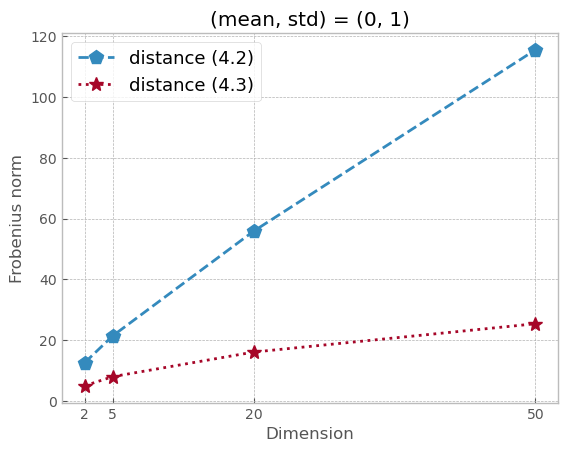

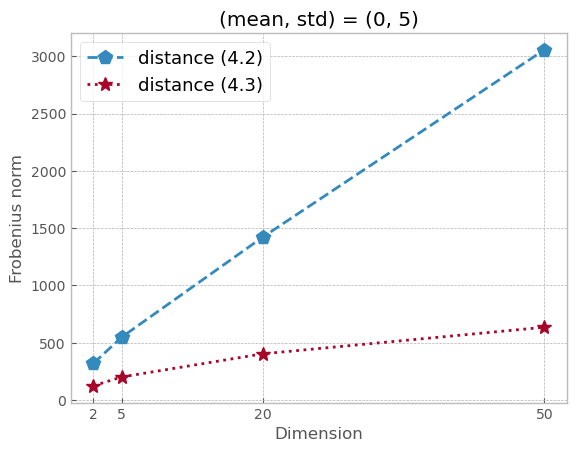

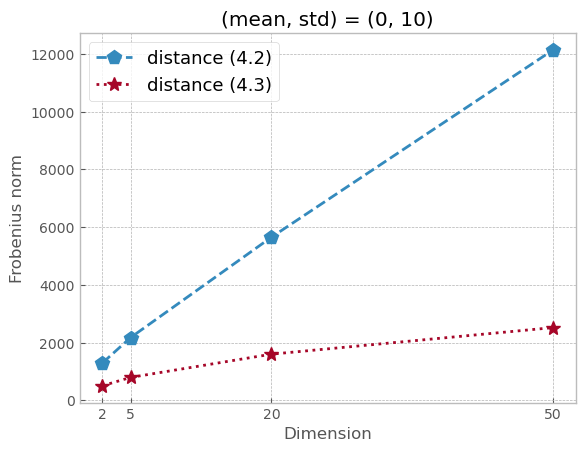

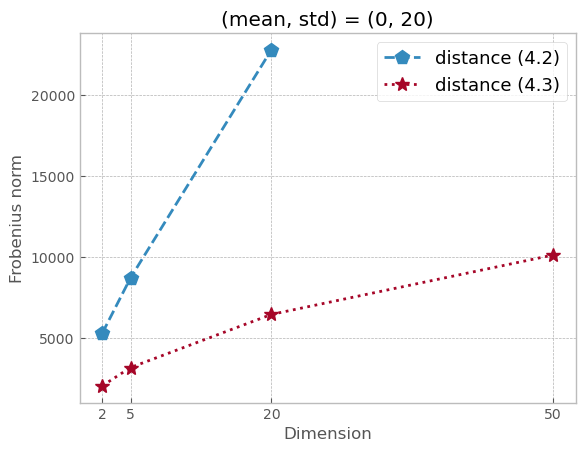

In [3]:
plt.style.use('ggplot')
plt.style.use('bmh')

titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
for j in range(4):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(dimensions, dist1[j, :], label='distance (4.2)', marker='p', linestyle='--', markersize=10)
    plt.plot(dimensions, dist2[j, :], label='distance (4.3)', marker='*', linestyle=':', markersize=10)
    plt.title(titles[j])
    plt.grid(True)
    plt.xticks(dimensions);
    plt.legend(fontsize=13)
    plt.xlabel("Dimension", fontsize=12)
    plt.ylabel("Frobenius norm", fontsize=12)
    plt.savefig('results/'+titles[j]+'_ft16', bbox_inches='tight')
    plt.show()

In [4]:
np.random.seed(0)

LOW_PREC = chop(np.float32)
dimensions = [2, 5, 20, 50]
dist1 = np.zeros((4, len(dimensions)))
dist2 = np.zeros((4, len(dimensions)))
err = np.zeros((4, len(dimensions)))

for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    data1 = np.random.normal(0, 1, size=(5000, ii))
    data2 = np.random.normal(0, 5, size=(5000, ii))
    data3 = np.random.normal(0, 10, size=(5000, ii))
    data4 = np.random.normal(0, 20, size=(5000, ii))

    data = [data1, data2, data3, data4]
    for d in range(4):
        dd = data[d]
        pd1 = pairwise_dist1(dd)
        pd2 = pairwise_dist2(dd)
        pd3 = mp1_pairwise_dist(dd, LOW_PREC, delta=0)
        pd4 = mp2_pairwise_dist(dd, LOW_PREC, delta=0)

        err[d, i] =  LA.norm(pd2 - pd1, 'fro')
        dist1[d, i] = LA.norm(pd3 - pd1, 'fro')
        dist2[d, i] = LA.norm(pd4 - pd1, 'fro')


100%|██████████| 4/4 [02:44<00:00, 41.12s/it]


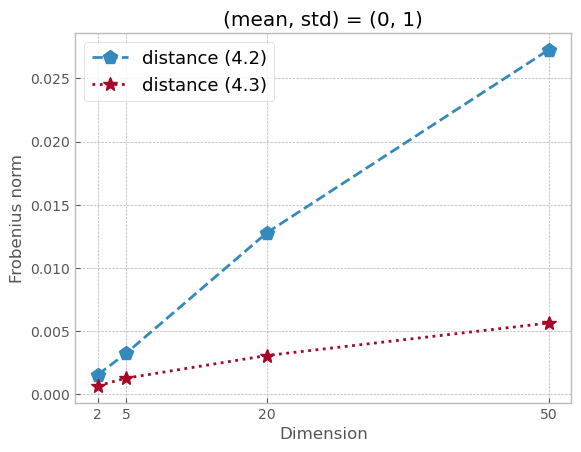

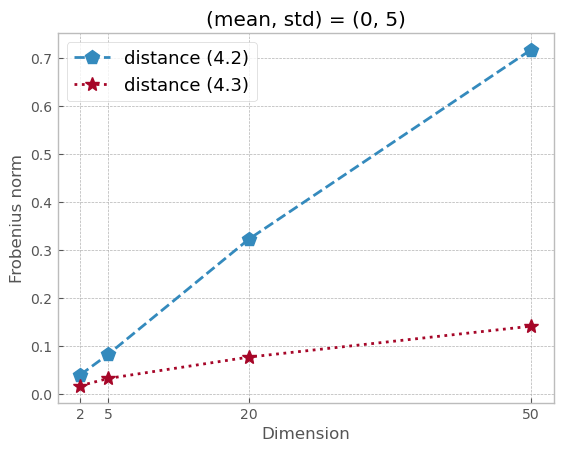

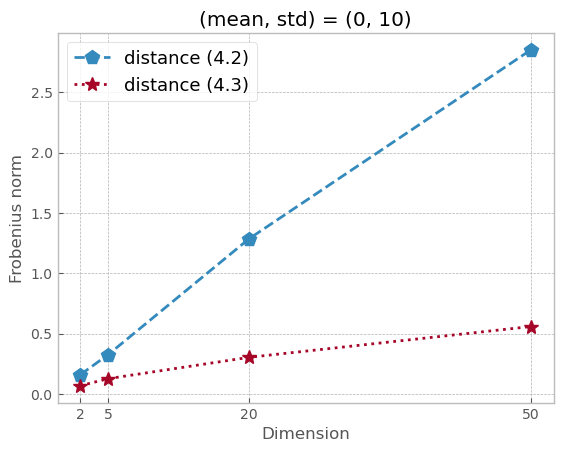

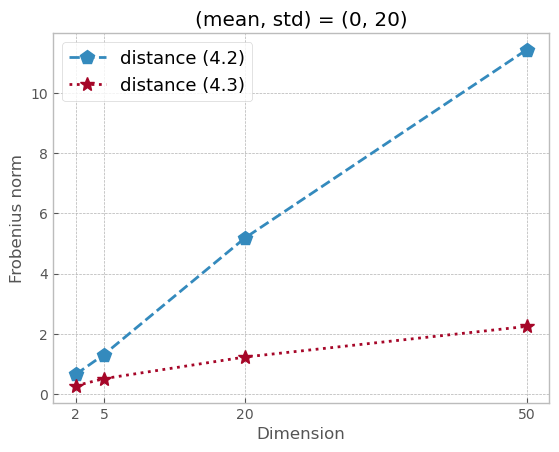

In [5]:
plt.style.use('ggplot')
plt.style.use('bmh')

titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']
for j in range(4):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.plot(dimensions, dist1[j, :], label='distance (4.2)', marker='p', linestyle='--', markersize=10)
    plt.plot(dimensions, dist2[j, :], label='distance (4.3)', marker='*', linestyle=':', markersize=10)
    plt.title(titles[j])
    plt.grid(True)
    plt.xticks(dimensions);
    plt.legend(fontsize=13)
    plt.xlabel("Dimension", fontsize=12)
    plt.ylabel("Frobenius norm", fontsize=12)
    plt.savefig('results/'+titles[j]+'_ft32', bbox_inches='tight')
    plt.show()